In [1]:
### for array operations
import numpy as np

### for plotting
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

### for operations on FITS images
from astropy.io import fits

### statistics functions needed in this tutorial
from scipy import stats
from scipy.stats import norm


In [2]:
#initialize lists
filename=['flat.00000007.FLAT.FIT',\
'flat.00000008.FLAT.FIT',\
'flat.00000009.FLAT.FIT',\
'flat.00000010.FLAT.FIT',\
'flat.00000011.FLAT.FIT',\
'flat.00000012.FLAT.FIT',\
'flat.00000013.FLAT.FIT',\
'flat.00000014.FLAT.FIT',\
'flat.00000015.FLAT.FIT',\
'flat.00000016.FLAT.FIT']
flatimage=[None]*10
imagedata=[None]*10


In [3]:
#read .fits files
for i in range(10):
        flatimage[i]=fits.open(filename[i])
        imagedata[i]=flatimage[i][0].data

In [4]:
#take average of 10 flat-fields & make master flat field
avgcounts=np.mean(imagedata,axis=0)
avg=fits.PrimaryHDU(avgcounts)
#avg.writeto('avgcounts_flatfields.fits')
avgcounts.shape

(1024, 1024)

In [5]:
#normalize to typical counts level(mean), take relative sensitivity(ratio) of each pixel
avgcounts1=avgcounts.ravel()    # make 2d to 1d
mean=np.mean(avgcounts1)
std=np.std(avgcounts1)
ratio=avgcounts/mean
mean,std,max(avgcounts1),min(avgcounts1)


(15207.1449965477, 313.9904375078212, 26747.5, 12736.4)

In [6]:
#identify dead pixels indices using 3 sigmas
deadpix=np.where((avgcounts >= mean+3*std) | (avgcounts <= mean-3*std))
deadpix
#clip the master image by 3 sigmas
##avgcounts[np.where((avgcounts >= mean+3*std) | (avgcounts <= mean-3*std))]=np.NaN

(array([   0,    0,    0, ..., 1022, 1022, 1023]),
 array([   0,    1,    2, ...,   31, 1023, 1023]))

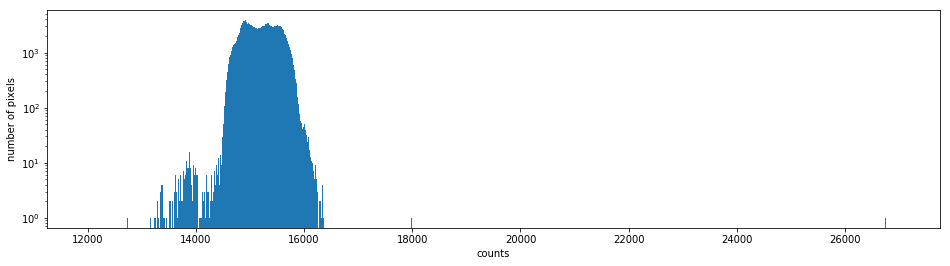

In [7]:
#plot histo of the counts for master flat-field
%matplotlib inline
plt.figure(figsize=(16,4))
plt.hist(avgcounts1,5000,range=[12000,27000])
plt.xlabel('counts')
plt.ylabel('number of pixels')
plt.yscale('log')
plt.show()

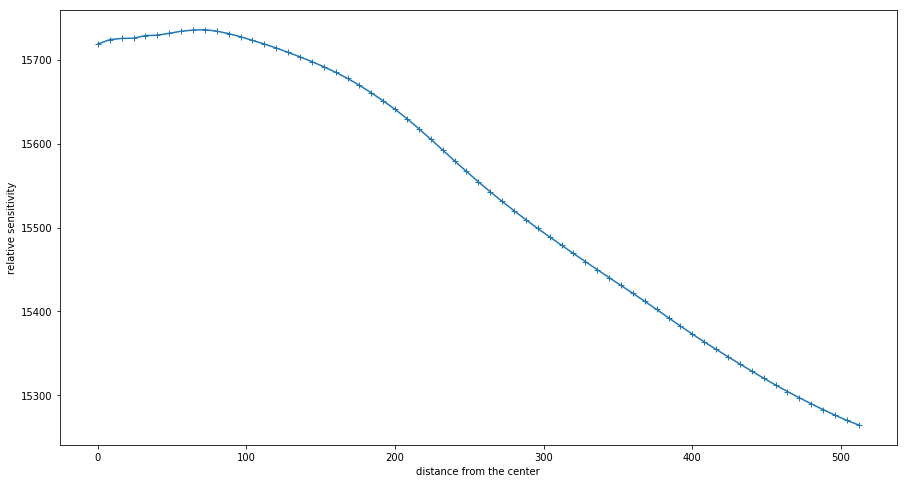

In [8]:
#plot relative sensitivity vs distance from the center
x=np.array(range(-512,513))
y=np.array(range(-512,513))
xc,yc=np.meshgrid(x,y)
xc=np.delete(xc,512,axis=0)
xc=np.delete(xc,512,axis=1)
yc=np.delete(yc,512,axis=0)
yc=np.delete(yc,512,axis=1) #get rid of 0 row/column

d=(xc**2+yc**2)**0.5 #distance from the center
r=np.array([i for i in range(0,520,8)]) #radius from 0,8,16...512
avgcounts[np.where((avgcounts >= mean+3*std) | (avgcounts <= mean-3*std))]=np.NaN
avgcounts_r=np.array([None]*65)
for i in range(65):
    avgcounts_r[i]=np.nanmean(avgcounts[np.where((d<8*(i+1) | (d>i)))])
plt.figure(figsize=(15,8))
plt.plot(r,avgcounts_r,'+-')
plt.xlabel('distance from the center')
plt.ylabel('relative sensitivity')
plt.show()